## D. ML Regression models, houses

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle
import json


In [2]:
Houses = pd.read_csv('DEF_house.csv', sep=',', na_values='None')
Aparts = pd.read_csv('DEF_apart.csv', sep=',', na_values='None')

In [3]:
Houses = Houses.drop('Unnamed: 0', axis=1)

In [4]:
Houses.columns

Index(['price', 'Commune', 'rank_city_pr', 'house_area', 'surface_of_the_land',
       'number_of_facades', 'number_of_rooms', 'garden', 'terrace',
       'terrace_area', 'fully_equipped_kitchen', 'open_fire', 'swimming_pool',
       'SB_as new', 'SB_just renovated', 'SB_good', 'SB_to be done up',
       'SB_to renovate', 'SB_to restore'],
      dtype='object')

In [5]:
Houses

,price,Commune,rank_city_pr,house_area,surface_of_the_land,number_of_facades,number_of_rooms,garden,terrace,terrace_area,fully_equipped_kitchen,open_fire,swimming_pool,SB_as new,SB_just renovated,SB_good,SB_to be done up,SB_to renovate,SB_to restore
0,340000,IXELLES,564.0,203.0,95.0,2.0,6,0,1,NaN,1,0,0,0,0,0,1,0,0
1,525000,KAPELLE-OP-DEN-BOS,497.0,250.0,826.0,4.0,6,1,1,40.0,1,0,0,1,0,0,0,0,0
2,550000,SPA,522.0,475.0,1543.0,4.0,11,1,1,NaN,1,0,0,0,0,1,0,0,0
3,550000,FRASNES-LEZ-ANVAING,340.0,325.0,3570.0,4.0,4,1,1,NaN,1,0,0,0,0,1,0,0,0
4,550000,CHARLEROI,19.0,400.0,616.0,3.0,5,1,1,80.0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22482,468000,RIJKEVORSEL,533.0,180.0,0.0,4.0,3,0,0,0.0,1,0,0,0,0,0,0,0,0
22483,454993,VILVOORDE,309.0,169.0,389.0,3.0,3,0,0,0.0,0,0,0,0,0,0,0,0,0
22484,475000,HOUTHALEN-HELCHTEREN,204.0,222.0,1124.0,4.0,3,0,0,0.0,0,0,0,0,0,0,0,0,0
22485,475000,ARLON,311.0,240.0,200.0,2.0,9,0,0,0.0,0,0,0,0,0,0,0,0,0


In [6]:
forImputation_h=Houses.drop('Commune',axis=1)

In [7]:
forImputation_h.isna().sum()

price                        0
rank_city_pr                 0
house_area                 118
surface_of_the_land        135
number_of_facades         2871
number_of_rooms              0
garden                       0
terrace                      0
terrace_area              6126
fully_equipped_kitchen       0
open_fire                    0
swimming_pool                0
SB_as new                    0
SB_just renovated            0
SB_good                      0
SB_to be done up             0
SB_to renovate               0
SB_to restore                0
dtype: int64

In [8]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()
imputed_data_h = imputer.fit_transform(forImputation_h)

In [9]:
imputed_data_h.shape

(22487, 18)

In [10]:
Houses_I = pd.DataFrame(data=imputed_data_h)

In [11]:
Houses_I.columns = ['price', 'rank_city_pr', 'house_area', 'surface_of_the_land',
       'number_of_facades', 'number_of_rooms', 'garden', 'terrace',
       'terrace_area', 'fully_equipped_kitchen', 'open_fire', 'swimming_pool',
       'SB_as new', 'SB_just renovated', 'SB_good', 'SB_to be done up',
       'SB_to renovate', 'SB_to restore']

In [12]:
Houses_I.isna().sum()

price                     0
rank_city_pr              0
house_area                0
surface_of_the_land       0
number_of_facades         0
number_of_rooms           0
garden                    0
terrace                   0
terrace_area              0
fully_equipped_kitchen    0
open_fire                 0
swimming_pool             0
SB_as new                 0
SB_just renovated         0
SB_good                   0
SB_to be done up          0
SB_to renovate            0
SB_to restore             0
dtype: int64

In [13]:
X_h=Houses_I.drop('price',axis=1) 
y_h=Houses_I['price'] 

In [14]:
X_h_poly = X_h
X_h_poly['rank_city_pr2'] = X_h_poly['rank_city_pr']**2
X_h_poly['rank_city_pr3'] = X_h_poly['rank_city_pr']**3
X_h_poly.columns

Index(['rank_city_pr', 'house_area', 'surface_of_the_land',
       'number_of_facades', 'number_of_rooms', 'garden', 'terrace',
       'terrace_area', 'fully_equipped_kitchen', 'open_fire', 'swimming_pool',
       'SB_as new', 'SB_just renovated', 'SB_good', 'SB_to be done up',
       'SB_to renovate', 'SB_to restore', 'rank_city_pr2', 'rank_city_pr3'],
      dtype='object')

In [15]:
X_h_poly = X_h_poly[['rank_city_pr', 'rank_city_pr2', 'rank_city_pr3', 'house_area', 'surface_of_the_land',
       'number_of_facades', 'number_of_rooms', 'garden', 'terrace',
       'terrace_area', 'fully_equipped_kitchen', 'open_fire', 'swimming_pool',
       'SB_as new', 'SB_just renovated', 'SB_good', 'SB_to be done up',
       'SB_to renovate', 'SB_to restore']]
X_h_poly

,rank_city_pr,rank_city_pr2,rank_city_pr3,house_area,surface_of_the_land,number_of_facades,number_of_rooms,garden,terrace,terrace_area,fully_equipped_kitchen,open_fire,swimming_pool,SB_as new,SB_just renovated,SB_good,SB_to be done up,SB_to renovate,SB_to restore
0,564.0,318096.0,179406144.0,203.0,95.0,2.0,6.0,0.0,1.0,25.473960,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,497.0,247009.0,122763473.0,250.0,826.0,4.0,6.0,1.0,1.0,40.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,522.0,272484.0,142236648.0,475.0,1543.0,4.0,11.0,1.0,1.0,35.219062,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,340.0,115600.0,39304000.0,325.0,3570.0,4.0,4.0,1.0,1.0,34.216015,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,19.0,361.0,6859.0,400.0,616.0,3.0,5.0,1.0,1.0,80.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22482,533.0,284089.0,151419437.0,180.0,0.0,4.0,3.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22483,309.0,95481.0,29503629.0,169.0,389.0,3.0,3.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22484,204.0,41616.0,8489664.0,222.0,1124.0,4.0,3.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22485,311.0,96721.0,30080231.0,240.0,200.0,2.0,9.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# X_h

In [17]:
# y_h

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_h_poly,y_h, test_size =0.2)

1. Standard Linear regression 

In [19]:
Mregressor = LinearRegression(normalize=True)
Mregressor.fit(X_train, y_train)

LinearRegression(normalize=True)

In [20]:
Mregressor.score(X_train, y_train)

0.6602477340839661

In [21]:
Mregressor.score(X_test, y_test)

0.6710145534431391

In [22]:
Mregressor.__init__

<bound method LinearRegression.__init__ of LinearRegression(normalize=True)>

In [23]:
Mregressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}

In [24]:
Mregressor.coef_

array([ 1.01375591e+03, -3.17059104e+00,  4.22671238e-03,  7.89292204e+02,
        1.54111108e+01,  1.23607352e+04,  1.21486742e+04,  7.38832642e+03,
        2.92156367e+03,  3.07590391e+02,  6.71753036e+03,  2.14368820e+04,
        6.94786281e+04,  4.04892296e+04,  1.77075255e+04, -5.29180571e+03,
       -4.14606464e+04, -7.01454466e+04, -8.28602587e+04])

2. Ridge regression 

Linear least squares with l2 regularization.

Minimizes the objective function:

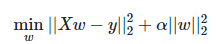

The complexity parameter alpha>= 0 controls the amount of shrinkage: the larger the value of alpha, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

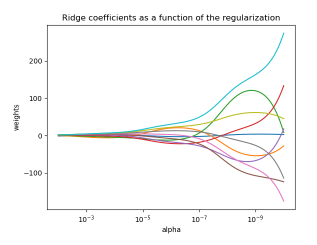

In [25]:
from sklearn.linear_model import Ridge

In [26]:
Mridge = Ridge(alpha=0.0001, normalize = True)
Mridge.fit(X_train, y_train)

Ridge(alpha=0.0001, normalize=True)

In [27]:
Mridge.score(X_train, y_train)

0.6602077452544314

In [28]:
Mridge.score(X_test, y_test)

0.6706347425708836

In [29]:
Mridge.coef_

array([ 9.49681197e+02, -2.89695132e+00,  3.91543714e-03,  7.89125555e+02,
        1.54064671e+01,  1.24393364e+04,  1.22077612e+04,  7.43198865e+03,
        2.91553174e+03,  3.06909733e+02,  6.66219388e+03,  2.14737030e+04,
        6.95987552e+04,  4.06088113e+04,  1.78291910e+04, -5.17781322e+03,
       -4.13861136e+04, -7.01053738e+04, -8.29561501e+04])

3. Lasso regression 

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. For this reason Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero coefficients (see Compressive sensing: tomography reconstruction with L1 prior (Lasso)).

Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:

 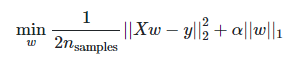
 
The lasso estimate thus solves the minimization of the least-squares penalty with 
 added, where  is a constant and 
 is the 
-norm of the coefficient vector.

In [30]:
from sklearn.linear_model import Lasso, lasso_path

In [31]:
Mlasso = Lasso(alpha=0.5) #, normalize = True)
Mlasso.fit(X_train, y_train)

C:\Users\jcmeu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101796096399211.89, tolerance: 59910612339.27653
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5)

In [32]:
Mlasso.score(X_train, y_train)

0.6601851318822151

In [33]:
Mlasso.score(X_test, y_test)

0.6705300608635165

In [34]:
Mlasso.coef_

array([ 9.32400124e+02, -2.82865457e+00,  3.84188699e-03,  7.89295439e+02,
        1.54045661e+01,  1.24569784e+04,  1.22160438e+04,  7.45032238e+03,
        2.89713285e+03,  3.06805108e+02,  6.64094407e+03,  2.14697829e+04,
        6.95982076e+04,  4.06533415e+04,  1.78627939e+04, -5.14309802e+03,
       -4.13674603e+04, -7.01036169e+04, -8.29493700e+04])

In [35]:
 _, coef_path, _ = lasso_path(X_test, y_test, alphas=[1000., 100., 10., 5., 1., .5, .1])

C:\Users\jcmeu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26077517532035.938, tolerance: 66214559129.2825
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jcmeu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24936232378627.285, tolerance: 66214559129.2825
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jcmeu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24769844609362.7, tolerance: 66214559129.2825
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jcmeu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: Conv

In [36]:
print(coef_path)

[[ 7.32325435e+02  9.05653274e+02  9.56887218e+02  9.71622419e+02
   9.75923168e+02  9.77161414e+02  9.77524519e+02]
 [-2.25109232e+00 -3.00185076e+00 -3.22480561e+00 -3.28872002e+00
  -3.30740006e+00 -3.31277179e+00 -3.31434953e+00]
 [ 3.34058721e-03  4.18874208e-03  4.44272018e-03  4.51572419e-03
   4.53703687e-03  4.54317179e-03  4.54497130e-03]
 [ 8.24601206e+02  8.12529372e+02  8.11532862e+02  8.11353698e+02
   8.11288335e+02  8.11272869e+02  8.11267030e+02]
 [ 2.23471684e+01  2.14756368e+01  2.14312115e+01  2.14475338e+01
   2.14487578e+01  2.14500181e+01  2.14500347e+01]
 [ 2.39306153e+03  2.79592139e+03  2.59717540e+03  2.48225243e+03
   2.45573690e+03  2.44630036e+03  2.44423397e+03]
 [ 9.20605872e+03  9.74380935e+03  9.71067752e+03  9.67740033e+03
   9.67057678e+03  9.66787118e+03  9.66736590e+03]
 [ 0.00000000e+00  1.13078257e+03  1.31852575e+03  1.30466231e+03
   1.30887128e+03  1.30796569e+03  1.30852343e+03]
 [-1.32974616e+03 -1.09219191e+04 -1.21098867e+04 -1.22748823e+0

4. Elastic net

ElasticNet is a linear regression model trained with both 
 and 
-norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of 
 and 
 using the l1_ratio parameter.

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is that it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

The objective function to minimize is in this case

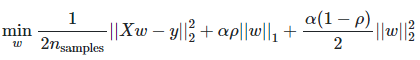

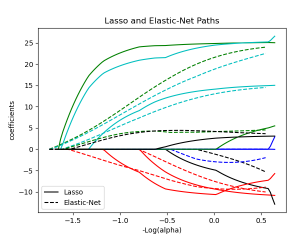

The class ElasticNetCV can be used to set the parameters alpha () and l1_ratio () by cross-validation.

In [37]:
from sklearn.linear_model import Lasso, lasso_path, ElasticNet

In [38]:
MElasticNet = ElasticNet(l1_ratio=1, max_iter=10000) #, normalize = True)
MElasticNet.fit(X_train, y_train)

ElasticNet(l1_ratio=1, max_iter=10000)

In [39]:
MElasticNet.score(X_train, y_train)

0.6602477250705246

In [40]:
MElasticNet.score(X_test, y_test)

0.6710154142753064

In [41]:
MElasticNet.coef_

array([ 1.01378213e+03, -3.17065894e+00,  4.22678021e-03,  7.89300678e+02,
        1.54116389e+01,  1.23591813e+04,  1.21479598e+04,  7.38620165e+03,
        2.90803454e+03,  3.08041983e+02,  6.71446647e+03,  2.14260488e+04,
        6.94312718e+04,  4.04939349e+04,  1.76995081e+04, -5.27863590e+03,
       -4.14413359e+04, -7.01275457e+04, -8.26924570e+04])

In [42]:
 _, coef_path, _ = lasso_path(X_test, y_test, alphas=[1000., 100., 10., 5., 1., .5, .1])

C:\Users\jcmeu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26077517532035.938, tolerance: 66214559129.2825
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jcmeu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24936232378627.285, tolerance: 66214559129.2825
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jcmeu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24769844609362.7, tolerance: 66214559129.2825
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jcmeu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: Conv

4. Least angle regression 

In [48]:
from sklearn.linear_model import Lars

In [49]:
MLars = Lars() #, normalize = True)
MLars.fit(X_train, y_train)

Lars()

In [50]:
MLars.score(X_train, y_train)

-57.09124103957068

In [47]:
MLars.score(X_test, y_test)

-57.24741015421327

In [51]:
MLars.coef_

array([ 7.81803884e+04, -3.32087478e+02,  3.77494949e-01,  8.78077789e+02,
        2.09906950e+01, -7.89982669e+04, -5.49345775e+04, -4.47088412e+04,
        1.36348444e+04,  1.17328972e+03,  7.01968633e+04, -1.70585323e+04,
       -7.11917051e+04, -1.01745832e+05, -1.28712669e+05, -1.39053252e+05,
       -1.25866493e+05, -1.06991518e+05,  4.35189828e+04])

5. Orthogonal matching pursuit 

In [53]:
from sklearn.linear_model import OrthogonalMatchingPursuit

In [75]:
Momp = OrthogonalMatchingPursuit(n_nonzero_coefs=16) #, normalize = True)
Momp.fit(X_train, y_train)

OrthogonalMatchingPursuit(n_nonzero_coefs=16)

In [76]:
Momp.score(X_train, y_train)

0.6529635353542238

In [77]:
Momp.score(X_test, y_test)

0.658936567485023

In [78]:
Momp.coef_

array([ 1.95795506e+02,  4.55444164e-01,  0.00000000e+00,  7.85629482e+02,
        1.53128985e+01,  1.32986843e+04,  1.29607118e+04,  7.97639928e+03,
        0.00000000e+00,  3.66908066e+02,  5.66641878e+03,  2.18456049e+04,
        7.08685408e+04,  4.40187926e+04,  2.13854260e+04,  0.00000000e+00,
       -3.82848745e+04, -6.75592508e+04, -8.15072505e+04])

20. XGBoost

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.cross_validation import  train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from scipy.stats import skew
from collections import OrderedDict

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgboost = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [ ]:
xgboost.fit(X_train, y_train)


In [ ]:
OrderedDict(sorted(xgboost.booster().get_fscore().items(), key=lambda t: t[1], reverse=True))

In [ ]:
most_relevant_features= list( dict((k, v) for k, v in xgboost.booster().get_fscore().items() if v >= 10).keys())
print(most_relevant_features)

In [ ]:
plt.scatter(train_dataset.GrLivArea, train_dataset.SalePrice, c = "blue", marker = "s")
plt.title("GrLivArea vs SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

y. saving models in pickel file 

In [33]:
X_train.iloc[0,:]

rank_city_pr                  154.0
rank_city_pr2               23716.0
rank_city_pr3             3652264.0
house_area                    185.0
surface_of_the_land           206.0
number_of_facades               2.0
number_of_rooms                 4.0
garden                          1.0
terrace                         0.0
terrace_area                    0.0
fully_equipped_kitchen          0.0
open_fire                       0.0
swimming_pool                   0.0
SB_as new                       0.0
SB_just renovated               0.0
SB_good                         1.0
SB_to be done up                0.0
SB_to renovate                  0.0
SB_to restore                   0.0
Name: 14207, dtype: float64

In [26]:
X_train.iloc[0,:].values.reshape(1,X_train.shape[1])

array([[1.540000e+02, 2.371600e+04, 3.652264e+06, 1.850000e+02,
        2.060000e+02, 2.000000e+00, 4.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00]])

In [27]:
X_train.iloc[0,:].shape

(19,)

In [28]:
Mregressor.predict(X_train.iloc[0,:].values.reshape(1,X_train.shape[1]))

array([204163.34455349])

In [29]:
y_train.iloc[0]

275000.0

In [30]:
pickle.dump(Mregressor, open('House_regression', 'wb'))


In [31]:
essai = pickle.load(open('House_regression', 'rb'))


In [32]:
essai.predict(X_train.iloc[66,:].values.reshape(1,X_train.shape[1]))

array([385755.57167565])

In [33]:
y_train.iloc[66]

279000.0

In [34]:
X_train.columns

Index(['rank_city_pr', 'rank_city_pr2', 'rank_city_pr3', 'house_area',
       'surface_of_the_land', 'number_of_facades', 'number_of_rooms', 'garden',
       'terrace', 'terrace_area', 'fully_equipped_kitchen', 'open_fire',
       'swimming_pool', 'SB_as new', 'SB_just renovated', 'SB_good',
       'SB_to be done up', 'SB_to renovate', 'SB_to restore'],
      dtype='object')

In [35]:
Houses.describe().T

,count,mean,std,min,25%,50%,75%,max
price,22487.0,335571.037044,182531.720413,2500.0,210000.00,297029.0,415000.0,950000.0
rank_city_pr,22487.0,273.986837,171.136013,1.0,117.00,268.0,423.0,580.0
house_area,22369.0,196.864545,94.187597,13.0,136.00,174.0,231.0,710.0
surface_of_the_land,22352.0,753.100841,1310.201713,0.0,152.75,360.0,830.0,15444.0
number_of_facades,19616.0,2.950805,0.855014,1.0,2.00,3.0,4.0,4.0
number_of_rooms,22487.0,3.470183,1.366356,0.0,3.00,3.0,4.0,16.0
garden,22487.0,0.465958,0.498851,0.0,0.00,0.0,1.0,1.0
terrace,22487.0,0.551385,0.497364,0.0,0.00,1.0,1.0,1.0
terrace_area,16361.0,11.141923,18.718626,0.0,0.00,0.0,20.0,115.0
fully_equipped_kitchen,22487.0,0.697914,0.459172,0.0,0.00,1.0,1.0,1.0


z. Function for running house models

In [36]:
def make_house_R (cp, house_area=196, surf_land=753, numb_facades=3, numb_rooms=3, garden=1, 
                  terrace=0, terrace_area=0, equip_kitch=1, fire=0, pool=0, Sas_new=0, Sjust_renov=0, 
                  Sgood=1, Sto_refresh=0, Sto_renov=0, Sto_restor=0):
    with open('CP_to_city.json', 'r') as fcp:
        cp_to_city = json.load(fcp)
        city = cp_to_city['Commune principale'][str(cp)]
    with open('City_to_rank.json', 'r') as fci:
        city_to_rank = json.load(fci)
        rank = city_to_rank[str(city)]
    features = np.array([[rank, rank**2, rank**3,house_area,surf_land,numb_facades, 
                          numb_rooms,  garden,terrace, terrace_area,equip_kitch, fire,pool, 
                          Sas_new, Sjust_renov, Sgood,Sto_refresh, Sto_renov, Sto_restor]])
    House_model = pickle.load(open('House_regression', 'rb'))
    return House_model.predict(features)

In [37]:
make_house_R (7850, 20, 500, 4, 4, 1, 1, 50, 1, 1, 1, 0,0,0,0,0,1)

array([300509.47821768])

### Houses models